# Final Project

Gabrielle Martinez  
gm34308n@pace.edu   
Professor Kaltenberg  
ECO590 Data Analysis with Python and R   
2 December 2020

In this R Jupyter Notebook, I'll clean the data I've collected from the PatentsView API in the Python notebook. I'll also be showcasing the graphs made in the python notebook along with my regression anylsis. 

## Contents
1. Part 1: PatentsView API - See `Gabrielle Martinez - Python.ipynb`
2. [Part 2: Data Cleaning](http://localhost:8888/notebooks/Documents/eco590_Data_Analysis_Python_R/Assignments/final%20project/Gabrielle%20Martinez%20-%20R.ipynb#Part-2:-Data-Cleaning)
3. [Part 3: Graphs](http://localhost:8888/notebooks/Documents/eco590_Data_Analysis_Python_R/Assignments/final%20project/Gabrielle%20Martinez%20-%20R.ipynb#Part-3:-Graphs) - See `Gabrielle Martinez - Python.ipynb` for code
4. [Part 4: Regressions](http://localhost:8888/notebooks/Documents/eco590_Data_Analysis_Python_R/Assignments/final%20project/Gabrielle%20Martinez%20-%20R.ipynb#Part-4:-Regressions)


## Part 2: Data Cleaning
There were a few issues with my dataset. For one, I still have to create a few variables, the number of patents and the specialization variables. Secondly, I was unsuccessful in unbiasing the number of inventors variable. It is still very likely there is double counting happening. Thirdly, some of the country names/country codes change between patent entries. For example, Japan is coded as both JP and JA. leading to duplications. And Japan is not the only country with this confusion.   
  
I also had to figure out what each of the `assignee_type` codes mean but it was all well documented so it wasn't much of a problem.   

There was also some weirdness with the assignees duplicating in year. For example I'll have Toyota 1977 and another Toyota 1977 right after it. It wasn't actually duplicating, however, since the country codes were different. One Toyota 1977 would be in Japan and the other instance would be in the US. The second instance would only have 1 patent usually. I decided to keep this strangeness since companies move and have multiple locations. Since I'm keeping many companies that only have 1 patent, it wouldn't make sense to drop an instance with only one patent. This does mean that I cannot run a two way fixed effects model since R would see the duplication of Toyota 1977 (two instances with the same year and assignee) and refuse to run. 

Beyond that, there weren't many hurdles to jump through for data cleaning. 

In [1]:
#set up
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::

In [2]:
#set working dir
setwd("~/eco590_Data_Analysis_Python_R/Assignments/final project")

In [3]:
#load patents data
total_patents <- read.csv("total_patents_1976to87.csv")
head(total_patents)

years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_id,assignee_country,assignee_state,assignee_key_id,num_inventors
1976,3934417,60/516,Robertshaw Controls Company,2,org_WLFbXEQXv0uuNglpaujt,US,VA,405316,4
1976,3937017,60/516,Maschinenfabrik Augsburg-Nurnberg Aktiengesellschaft,3,org_d7Cgs8GkaSDEwmfFOL1Z,DT,,119492,3
1976,3953715,701/123,Societe des Procedes Modernes d'Injection Sopromi,3,org_Z8mWQfh54whRqC1GqzOM,FR,,443684,1
1976,3953716,701/123,Agence Nationale de Valorisation de la Recherche (ANVAR),7,org_7IZPx0no0y4uuAMGwkei,FR,,54873,1
1976,3956895,60/516,The United States of America as represented by the National Institute of Health,6,org_aaQSmBL5udG3Y90mfh5v,US,DC,76455,4
1976,3956898,60/698,"Combustion Engineering, Inc.",2,org_5jkJ96hMiw938qSgh5Mq,US,CT,40134,1


In [6]:
#drop assignee_id
total_patents %>%
    select(!assignee_id) -> total_patents
total_patents

years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors
1976,3934417,60/516,Robertshaw Controls Company,2,US,VA,405316,4
1976,3937017,60/516,Maschinenfabrik Augsburg-Nurnberg Aktiengesellschaft,3,DT,,119492,3
1976,3953715,701/123,Societe des Procedes Modernes d'Injection Sopromi,3,FR,,443684,1
1976,3953716,701/123,Agence Nationale de Valorisation de la Recherche (ANVAR),7,FR,,54873,1
1976,3956895,60/516,The United States of America as represented by the National Institute of Health,6,US,DC,76455,4
1976,3956898,60/698,"Combustion Engineering, Inc.",2,US,CT,40134,1
1976,3958418,60/272,General Motors Corporation,2,US,MI,38960,2
1976,3964443,701/103,The Bendix Corporation,2,US,MI,47634,1
1976,3966362,60/698,"Airco, Inc.",2,US,NJ,297100,1
1976,3967097,701/123,General Motors Corporation,2,US,MI,38960,1


In [7]:
#get info on what type each column is
as.factor(total_patents$assignee_type) -> total_patents$assignee_type #change assignee_type from int to factor

total_patents %>%
    sapply(class)


years         patent_number      uspc_subclass_id 
            "integer"              "factor"              "factor" 
assignee_organization         assignee_type      assignee_country 
             "factor"              "factor"              "factor" 
       assignee_state       assignee_key_id         num_inventors 
             "factor"             "integer"             "numeric"

### Filter 180/subclasses 65.1 through 65.8
Remember when I grabbed the whole class for 180? Now I'm filtering out the subclasses I want. 

In [9]:
#make a list of strings
paste(c(1:8)) -> decimals

a=c()
for (i in decimals){
    a[i] <- paste('180/65.',i,sep="")
}
a #list of subclasses to search for

#filter
total_patents %>%
    filter(str_detect(uspc_subclass_id, paste(a, collapse = "|"))) -> subclasses_180

subclasses_180

#str_detect: https://stackoverflow.com/questions/22850026/filter-rows-which-contain-a-certain-string
#collapse: https://stackoverflow.com/questions/35962426/multiple-strings-with-str-detect-r
# | = or 

1          2          3          4          5          6          7 
"180/65.1" "180/65.2" "180/65.3" "180/65.4" "180/65.5" "180/65.6" "180/65.7" 
         8 
"180/65.8"

years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors
1976,3937293,180/65.6,Siemens Aktiengesellschaft,3,DE,,345236,1
1976,3943420,180/65.8,Crompton Electricars Ltd.,3,,,183565,1
1976,3943726,180/65.31,"Lawrence Peska Associates, Inc.",12,US,NY,333476,1
1976,3965971,180/65.8,EATON CORPORATION,2,US,OH,452507,1
1976,3970163,180/65.26,"Nissan Motor Co., Ltd.",3,JA,,43058,1
1976,3984742,180/65.1,Firma Deutsche Automobilgesellschaft mbH,3,JA,,63586,1
1976,3986095,180/65.1,The Japan Tobacco & Salt Public Corporation,3,JA,,404011,2
1977,4005759,180/65.1,Lucas Industries public limited company,3,EN,,175705,1
1977,4020916,180/65.1,"The Raymond Lee Organization, Inc.",12,US,NY,33742,1
1977,4021677,180/65.25,"Petro-Electric Motors, Ltd.",2,US,NY,451293,2


In [10]:
#drop all class 180 rows
total_patents %>%
    filter(!str_detect(uspc_subclass_id,'180')) %>% #-> pats_filtered
    bind_rows(subclasses_180,id=NULL) -> total_patents #add subclasses back in and save to total_patents

nrow(total_patents)
total_patents #work with this dataset from now on

[1] 11842

years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors
1976,3934417,60/516,Robertshaw Controls Company,2,US,VA,405316,4
1976,3937017,60/516,Maschinenfabrik Augsburg-Nurnberg Aktiengesellschaft,3,DT,,119492,3
1976,3953715,701/123,Societe des Procedes Modernes d'Injection Sopromi,3,FR,,443684,1
1976,3953716,701/123,Agence Nationale de Valorisation de la Recherche (ANVAR),7,FR,,54873,1
1976,3956895,60/516,The United States of America as represented by the National Institute of Health,6,US,DC,76455,4
1976,3956898,60/698,"Combustion Engineering, Inc.",2,US,CT,40134,1
1976,3958418,60/272,General Motors Corporation,2,US,MI,38960,2
1976,3964443,701/103,The Bendix Corporation,2,US,MI,47634,1
1976,3966362,60/698,"Airco, Inc.",2,US,NJ,297100,1
1976,3967097,701/123,General Motors Corporation,2,US,MI,38960,1


### Fixing Country Codes
- JA & JP are both Japan
- DE & DT are both Germany
- SW & SE are both Sweden
- EN & GB are both England/UK

In [14]:
#change type
as.character(total_patents$assignee_country) -> total_patents$assignee_country
sapply(total_patents,class)

#replace JA w JP
total_patents$assignee_country[total_patents$assignee_country == 'JA'] <- 'JP'

#check that there are no JAs left
total_patents %>%
    filter(assignee_country == 'JA') #no JAs yay!


#replace DE w DT
total_patents$assignee_country[total_patents$assignee_country == 'DT'] <- 'DE'

#check that there are no DTs left
total_patents %>%
    filter(assignee_country == 'DT') #no DTs yay!


#replace EN w GB
total_patents$assignee_country[total_patents$assignee_country == 'EN'] <- 'GB'

#check that there are no ENs left
total_patents %>%
    filter(assignee_country == 'EN') #no ENs yay!


#replace SW w SE new ISO uses SE
total_patents$assignee_country[total_patents$assignee_country == 'SW'] <- 'SE'

#check that there are no SWs left
total_patents %>%
    filter(assignee_country == 'SW') #no SWs yay!


#change type back to factor
as.factor(total_patents$assignee_country) -> total_patents$assignee_country
sapply(total_patents,class)

#show new df
total_patents

years         patent_number      uspc_subclass_id 
            "integer"              "factor"              "factor" 
assignee_organization         assignee_type      assignee_country 
             "factor"              "factor"           "character" 
       assignee_state       assignee_key_id         num_inventors 
             "factor"             "integer"             "numeric"

years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors


years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors


years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors


years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors


years         patent_number      uspc_subclass_id 
            "integer"              "factor"              "factor" 
assignee_organization         assignee_type      assignee_country 
             "factor"              "factor"              "factor" 
       assignee_state       assignee_key_id         num_inventors 
             "factor"             "integer"             "numeric"

years,patent_number,uspc_subclass_id,assignee_organization,assignee_type,assignee_country,assignee_state,assignee_key_id,num_inventors
1976,3934417,60/516,Robertshaw Controls Company,2,US,VA,405316,4
1976,3937017,60/516,Maschinenfabrik Augsburg-Nurnberg Aktiengesellschaft,3,DE,,119492,3
1976,3953715,701/123,Societe des Procedes Modernes d'Injection Sopromi,3,FR,,443684,1
1976,3953716,701/123,Agence Nationale de Valorisation de la Recherche (ANVAR),7,FR,,54873,1
1976,3956895,60/516,The United States of America as represented by the National Institute of Health,6,US,DC,76455,4
1976,3956898,60/698,"Combustion Engineering, Inc.",2,US,CT,40134,1
1976,3958418,60/272,General Motors Corporation,2,US,MI,38960,2
1976,3964443,701/103,The Bendix Corporation,2,US,MI,47634,1
1976,3966362,60/698,"Airco, Inc.",2,US,NJ,297100,1
1976,3967097,701/123,General Motors Corporation,2,US,MI,38960,1


### Creating new variables and collapsing to firm level data 
Instead of patent level data, I want to group by firm to get firm level data. I'll need new variables for this:
- number of inventors per firm per year    
- number of patents per firm per year   
- specialization of firm per year   

In [37]:
#groupby to find num of inventors per year for each firm
total_patents %>%
    group_by(assignee_key_id,years) %>%
    summarize(number_of_inventors = sum(num_inventors)) -> num_inventors

#show df
nrow(num_inventors)
num_inventors

`summarise()` regrouping output by 'assignee_key_id' (override with `.groups` argument)


[1] 2820

assignee_key_id,years,number_of_inventors
633,1980,1
708,1982,1
1477,1987,1
1544,1977,1
2091,1983,1
2267,1976,116
2267,1977,197
2267,1978,214
2267,1979,208
2267,1980,286


In [38]:
# extract assignee data 
total_patents %>%
    select(!patent_number & !uspc_subclass_id & !num_inventors) -> assignee_data

assignee_data %>%
    group_by(assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state) %>%
    summarise(number_of_patents = n()) -> assignee_data

nrow(assignee_data)    
assignee_data

`summarise()` regrouping output by 'assignee_key_id', 'years', 'assignee_organization', 'assignee_type', 'assignee_country' (override with `.groups` argument)


[1] 2872

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,number_of_patents
633,1980,Blackstone Corporation,2,US,NY,1
708,1982,Enertec,3,US,IN,1
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,,1
1544,1977,American Motors Corporation,2,US,MI,1
2091,1983,B & C Enterprises,2,US,WY,1
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,,55
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,,,1
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,JP,,85
2267,1978,Toyota Jidosha Kabushiki Kaisha,3,JP,,89
2267,1979,Toyota Jidosha Kabushiki Kaisha,3,JP,,81


In [39]:
#merge assignee_data w num_inventors
assignee_data %>%
    left_join(num_inventors,by=c('assignee_key_id','years')) -> firms
nrow(firms)

#sort just for easy viewing
firms %>% arrange(assignee_key_id,desc()) 

[1] 2872

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,number_of_patents,number_of_inventors
633,1980,Blackstone Corporation,2,US,NY,1,1
708,1982,Enertec,3,US,IN,1,1
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,,1,1
1544,1977,American Motors Corporation,2,US,MI,1,1
2091,1983,B & C Enterprises,2,US,WY,1,1
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,,55,116
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,,,1,197
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,JP,,85,197
2267,1978,Toyota Jidosha Kabushiki Kaisha,3,JP,,89,214
2267,1979,Toyota Jidosha Kabushiki Kaisha,3,JP,,81,208


And there we go. Now we have firm level data.

### Create Specialization variable

which.max(count) gives the index of the max value. If there's a tie, which.max returns the first instance
https://stackoverflow.com/questions/12039681/find-max-per-group-and-return-another-column

In [40]:
total_patents %>%
    group_by(assignee_key_id,years,uspc_subclass_id) %>%
    summarise(count=n()) %>%
    group_by(assignee_key_id,years) %>% 
    mutate(max = max(count)) %>% #specialization with highest frequecy
    mutate(specialization = uspc_subclass_id[which.max(count)]) %>%
    select(!count & !max & !uspc_subclass_id) %>% #dropping columns
    distinct() -> specialization  #dropping dupes and saving to df

nrow(specialization)
specialization

`summarise()` regrouping output by 'assignee_key_id', 'years' (override with `.groups` argument)


[1] 2820

assignee_key_id,years,specialization
633,1980,123/41.8
708,1982,123/538
1477,1987,123/41.8
1544,1977,123/553
2091,1983,123/142.5E
2267,1976,123/547
2267,1977,123/568.29
2267,1978,123/260
2267,1979,123/260
2267,1980,123/676


In [41]:
#merge w firms df 
firms %>%
    left_join(specialization,by=c('assignee_key_id','years')) -> firms
#try not to run this twice, you get weird results since its saving back into itself

nrow(firms)
head(firms)

[1] 2872

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,number_of_patents,number_of_inventors,specialization
633,1980,Blackstone Corporation,2,US,NY,1,1,123/41.8
708,1982,Enertec,3,US,IN,1,1,123/538
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,,1,1,123/41.8
1544,1977,American Motors Corporation,2,US,MI,1,1,123/553
2091,1983,B & C Enterprises,2,US,WY,1,1,123/142.5E
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,,55,116,123/547


### Merge Fuel Data
I have a dataset from the EIA that had the price for a gallon of fuel by state for 1970 to 1987

In [42]:
#load fuel data
fuel <- read.csv("gas_price_by_state.csv")
head(fuel, 18)

State,Years,fuel_dollars_per_gallon
AK,1970,0.40
AK,1971,0.41
AK,1972,0.40
AK,1973,0.43
AK,1974,0.60
AK,1975,0.64
AK,1976,0.67
AK,1977,0.71
AK,1978,0.76
AK,1979,0.95


In [43]:
firms %>%
    left_join(fuel, by=c('assignee_state'='State','years'='Years')) -> firms
#same here, only run once!

nrow(firms)
head(firms)

[1] 2872

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,number_of_patents,number_of_inventors,specialization,fuel_dollars_per_gallon
633,1980,Blackstone Corporation,2,US,NY,1,1,123/41.8,1.28
708,1982,Enertec,3,US,IN,1,1,123/538,1.31
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,,1,1,123/41.8,NA
1544,1977,American Motors Corporation,2,US,MI,1,1,123/553,0.65
2091,1983,B & C Enterprises,2,US,WY,1,1,123/142.5E,1.17
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,,55,116,123/547,NA


Now we have our full dataset (finally!)

### Recoding NAs and empty values to '.'

In [44]:
#check datatype - we can only replace using chars
sapply(firms,class)

#set to char
as.character(firms$assignee_state) -> firms$assignee_state
as.character(firms$assignee_country) -> firms$assignee_country
sapply(firms,class)

#replace empty w/ '.'
firms$assignee_state[firms$assignee_state==''] <- '.'
firms$assignee_country[firms$assignee_country==''] <- '.'


assignee_key_id                   years   assignee_organization 
              "integer"               "integer"                "factor" 
          assignee_type        assignee_country          assignee_state 
               "factor"                "factor"                "factor" 
      number_of_patents     number_of_inventors          specialization 
              "integer"               "numeric"                "factor" 
fuel_dollars_per_gallon 
              "numeric"

assignee_key_id                   years   assignee_organization 
              "integer"               "integer"                "factor" 
          assignee_type        assignee_country          assignee_state 
               "factor"             "character"             "character" 
      number_of_patents     number_of_inventors          specialization 
              "integer"               "numeric"                "factor" 
fuel_dollars_per_gallon 
              "numeric"

### Creating Dummy Variables
Make the Domestic and Government dummy variables

Classification of assignee:

- 2 - US Company or Corporation,
- 3 - Foreign Company or Corporation,
- 4 - US Individual,
- 5 - Foreign Individual,
- 6 - US Government,
- 7 - Foreign Government,
- 8 - Country Government, (though I don't know what they mean by country gov)
- 9 - State Government (US).   

Note: A "1" appearing before any of these codes signifies part interest

(from the [PatentsView API](https://api.patentsview.org/assignee.html))


Domestic == 2 and 6   
Government == 6-9

If you want to know if an firm is a domestic public entity, both should be 1. If a firm is a foregin public entity, gov should be 1 and domestic should be 0. If a firm is a domestic private company, domestic should be 1 and gov 0. If a firm is a foreign private company, both should be 0. I hope this gets around the multicolliniarity problem. If not, then I'll drop the gov variable.

In [45]:
#make domestic var
firms %>%
    mutate(domestic = ifelse(assignee_type=='2' | assignee_type=='6' | assignee_type=='12',1,0)) -> firms
    #mutate(government = ifelse(assignee_type=='6',1,0))


#making gov var - tho there's nothing in the 8 and 9 codes
#lets code for all cases - never know when I'll need to run this again ;)

#list of codes as strings
paste(c(6:9)) ->c

firms %>%
    mutate(government = ifelse(str_detect(assignee_type, paste(c, collapse = "|")),1,0)) -> firms

#see what government codes are present in the data
# firms %>%
#     filter(assignee_type=='6'|assignee_type=='7') %>% nrow() #6 and 7 have 50 entries, none for 8 and 9

# head(firms)

In [46]:
#make gov and domestic factor types
as.factor(firms$government) -> firms$government
as.factor(firms$domestic) -> firms$domestic
sapply(firms,class)
head(firms)

assignee_key_id                   years   assignee_organization 
              "integer"               "integer"                "factor" 
          assignee_type        assignee_country          assignee_state 
               "factor"             "character"             "character" 
      number_of_patents     number_of_inventors          specialization 
              "integer"               "numeric"                "factor" 
fuel_dollars_per_gallon                domestic              government 
              "numeric"                "factor"                "factor"

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,number_of_patents,number_of_inventors,specialization,fuel_dollars_per_gallon,domestic,government
633,1980,Blackstone Corporation,2,US,NY,1,1,123/41.8,1.28,1,0
708,1982,Enertec,3,US,IN,1,1,123/538,1.31,0,0
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,.,1,1,123/41.8,NA,0,0
1544,1977,American Motors Corporation,2,US,MI,1,1,123/553,0.65,1,0
2091,1983,B & C Enterprises,2,US,WY,1,1,123/142.5E,1.17,1,0
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,.,55,116,123/547,NA,0,0


### Add Cafe Regulation dataset
Dataset from the National Highway Traffic Safety Administration (Summary of Fuel Economy Performance, 2014)


In [53]:
#add cafe_regs
read.csv("cafe_regs.csv") -> regulation

regulation %>%
    select(MODEL.YEAR, Passenger.Cars.Combined) -> regulation

#change col names
gsub("Passenger.Cars.Combined","cafe_regs",names(regulation)) -> names(regulation)
regulation

MODEL.YEAR,cafe_regs
1978,18.0
1979,19.0
1980,20.0
1981,22.0
1982,24.0
1983,26.0
1984,27.0
1985,27.5
1986,26.0
1987,26.0


In [55]:
#merge cafe regs
left_join(firms,regulation, by=c("years"="MODEL.YEAR")) -> firms 
head(firms, 10)

#run once

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,num_pats,num_inventors,specialization,fuel_dollars_per_gallon,domestic,government,cafe_regs
633,1980,Blackstone Corporation,2,US,NY,1,1,123/41.8,1.28,1,0,20
708,1982,Enertec,3,US,IN,1,1,123/538,1.31,0,0,24
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,.,1,1,123/41.8,NA,0,0,26
1544,1977,American Motors Corporation,2,US,MI,1,1,123/553,0.65,1,0,NA
2091,1983,B & C Enterprises,2,US,WY,1,1,123/142.5E,1.17,1,0,26
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,.,55,116,123/547,NA,0,0,NA
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,.,.,1,197,123/568.29,NA,0,0,NA
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,JP,.,85,197,123/568.29,NA,0,0,NA
2267,1978,Toyota Jidosha Kabushiki Kaisha,3,JP,.,89,214,123/260,NA,0,0,18
2267,1979,Toyota Jidosha Kabushiki Kaisha,3,JP,.,81,208,123/260,NA,0,0,19


In [58]:
#set earlier cafe_regs to 0
#NAs get dropped in regressions and you don't want the earlier years to be dropped bc of NAs
firms$cafe_regs[is.na(firms$cafe_regs)] <- 0
head(firms,10)

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,num_pats,num_inventors,specialization,fuel_dollars_per_gallon,domestic,government,cafe_regs
633,1980,Blackstone Corporation,2,US,NY,1,1,123/41.8,1.28,1,0,20
708,1982,Enertec,3,US,IN,1,1,123/538,1.31,0,0,24
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,.,1,1,123/41.8,NA,0,0,26
1544,1977,American Motors Corporation,2,US,MI,1,1,123/553,0.65,1,0,0
2091,1983,B & C Enterprises,2,US,WY,1,1,123/142.5E,1.17,1,0,26
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,.,55,116,123/547,NA,0,0,0
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,.,.,1,197,123/568.29,NA,0,0,0
2267,1977,Toyota Jidosha Kabushiki Kaisha,3,JP,.,85,197,123/568.29,NA,0,0,0
2267,1978,Toyota Jidosha Kabushiki Kaisha,3,JP,.,89,214,123/260,NA,0,0,18
2267,1979,Toyota Jidosha Kabushiki Kaisha,3,JP,.,81,208,123/260,NA,0,0,19


### Exporting Cleaned Dataset
Some last minute cosmetic changes to column names and then we export the cleaned dataset to the python notebook.

In [59]:
#rename cols - bc I'm lazy
firms %>%
    rename(num_pats = number_of_patents, 
            num_inventors = number_of_inventors) -> firms
head(firms)

#https://www.statology.org/how-to-rename-data-frame-columns-in-r/

assignee_key_id,years,assignee_organization,assignee_type,assignee_country,assignee_state,num_pats,num_inventors,specialization,fuel_dollars_per_gallon,domestic,government,cafe_regs
633,1980,Blackstone Corporation,2,US,NY,1,1,123/41.8,1.28,1,0,20
708,1982,Enertec,3,US,IN,1,1,123/538,1.31,0,0,24
1477,1987,Kockner-Humboldt-Deutz Aktiengesellschaft,3,DE,.,1,1,123/41.8,NA,0,0,26
1544,1977,American Motors Corporation,2,US,MI,1,1,123/553,0.65,1,0,0
2091,1983,B & C Enterprises,2,US,WY,1,1,123/142.5E,1.17,1,0,26
2267,1976,Toyota Jidosha Kabushiki Kaisha,3,JP,.,55,116,123/547,NA,0,0,0


In [60]:
write.csv(firms, file="cleaned_firms.csv",row.names=FALSE)

## Part 3: Graphs
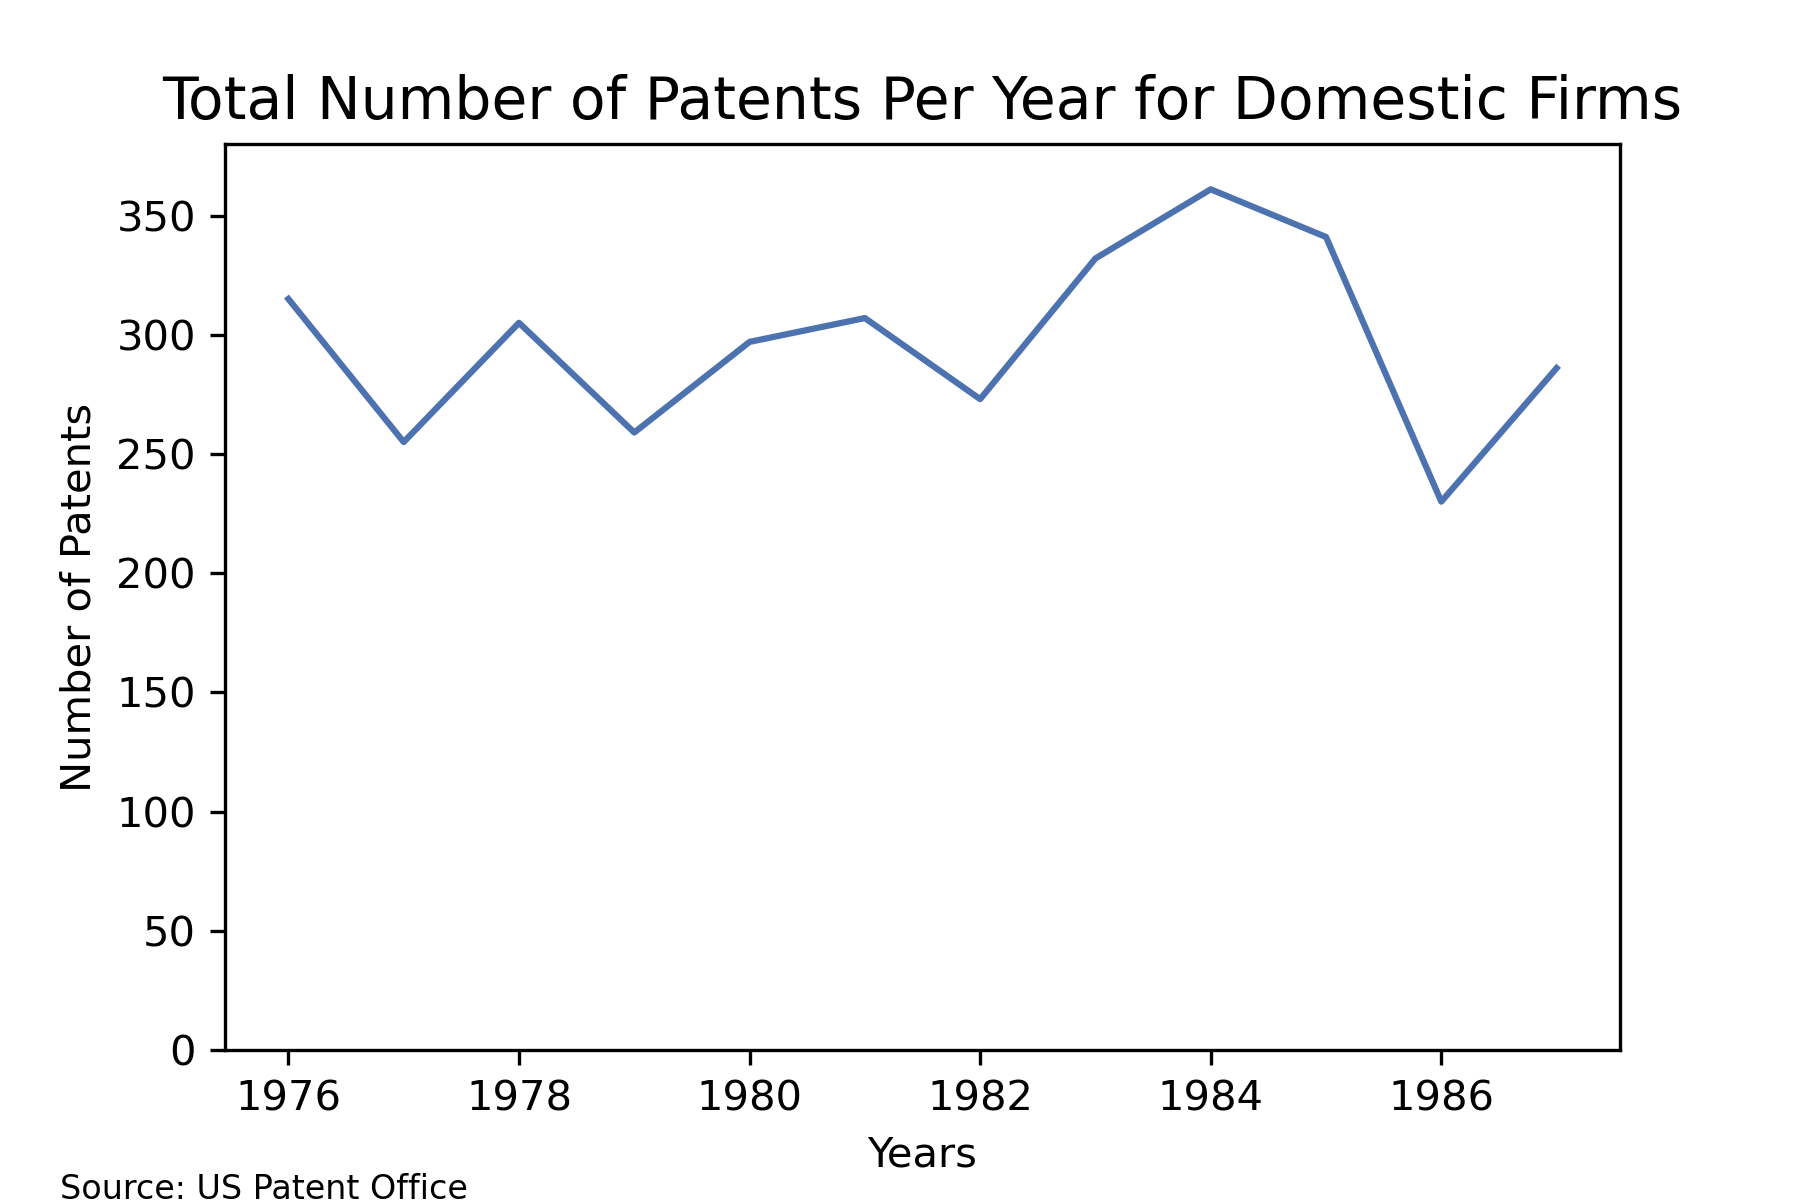
   
___________________________    
The total number of patents looks a lot more stable than the first time I ran the API code. I looks like I captured all the data this time. Rather than a sharp drop to 30 patents in the 1980s, we large increase between 1982 to 1984 before falling the later half of the decade. There is a drop in effiecent patenting in 1986 that for right now I don't have an explaination for. All in all, the trend of patenting looks fairly flat with a slightly positive trend.

  
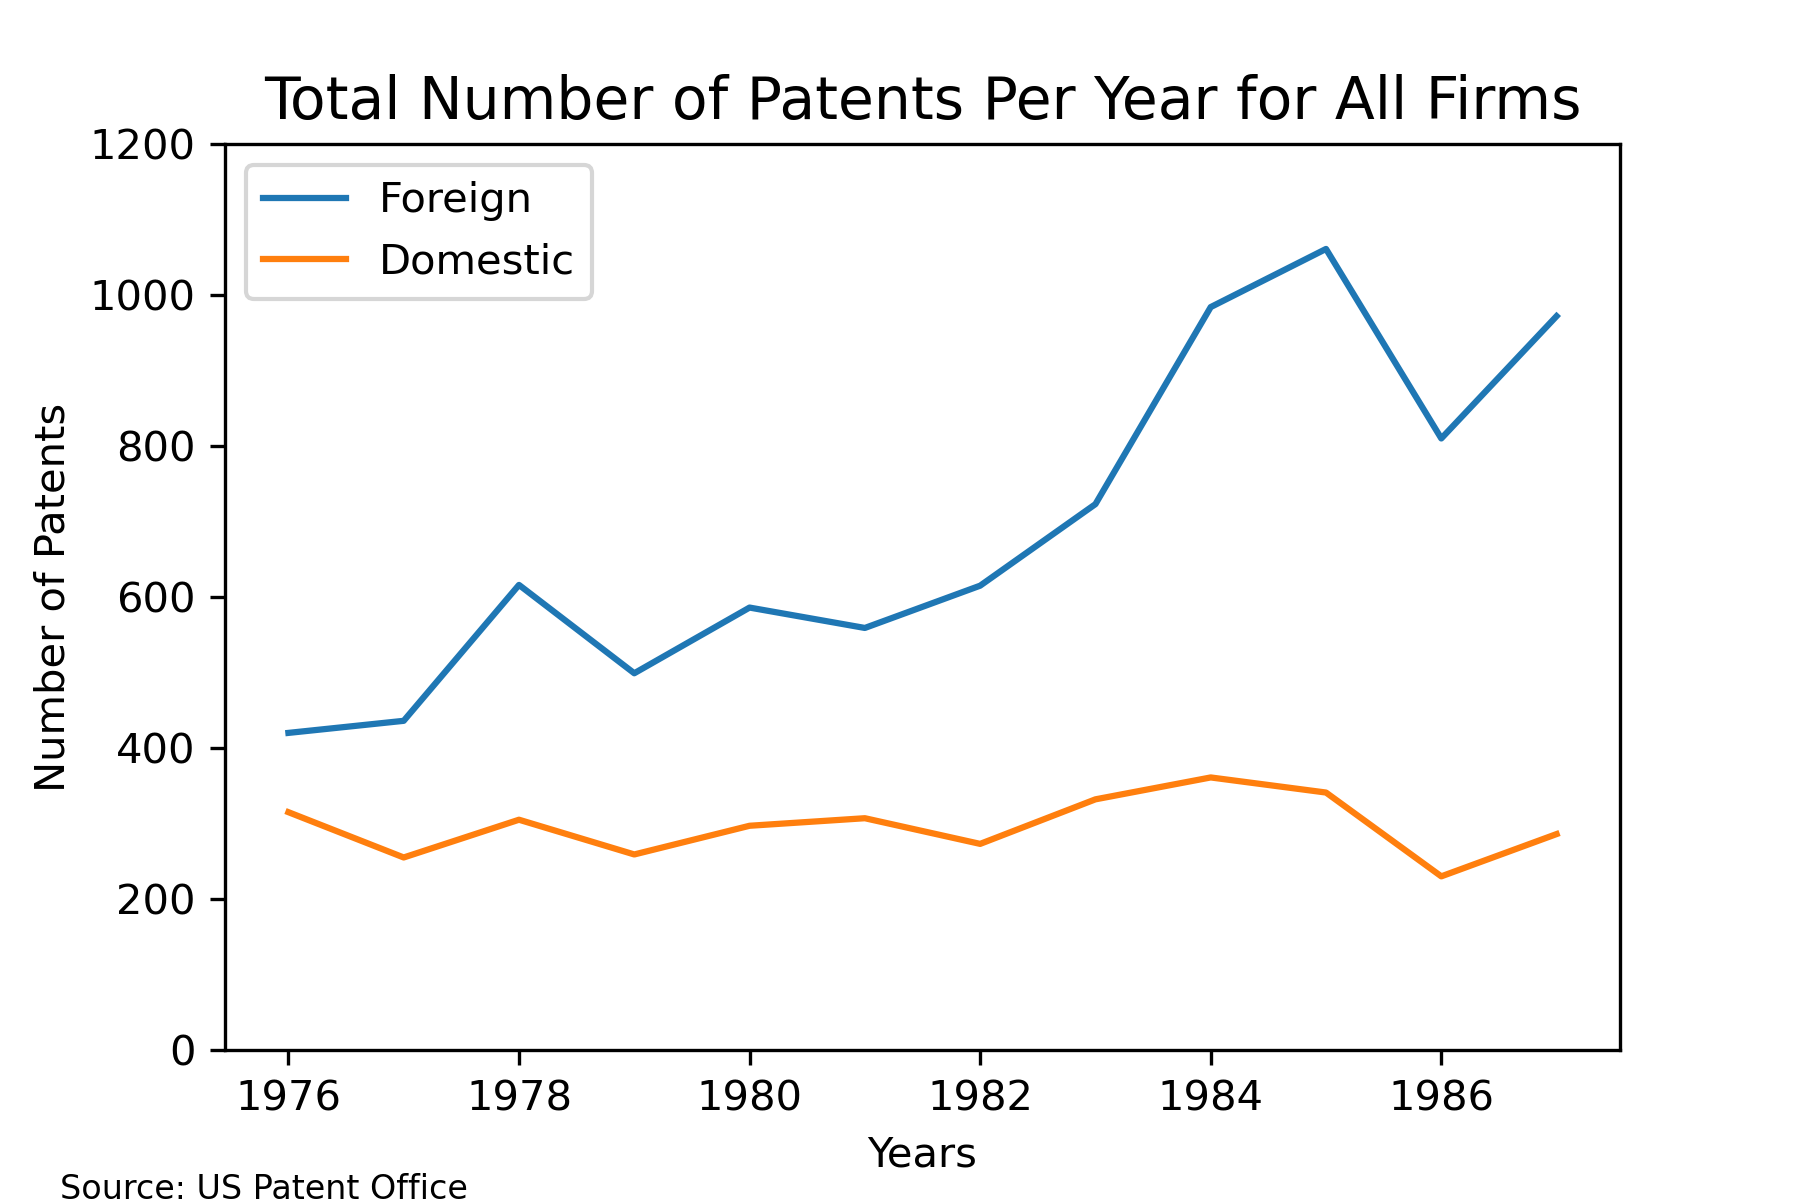  
    
________________________
We can see that the number of domestic firms is dwarfed by the total number of patents by foreign companies. Both types of firms see increases in the mid 1980s and a drop in 1986. There are peaks in 1984 and 1985 for domestic and foreign respectively. It is even more curious that there is decrease in 1986 for both types of firms. I wonder if a number of firms leaving the market is to blame. I have no evidence for this hypothesis, its just a guess given the time period. 

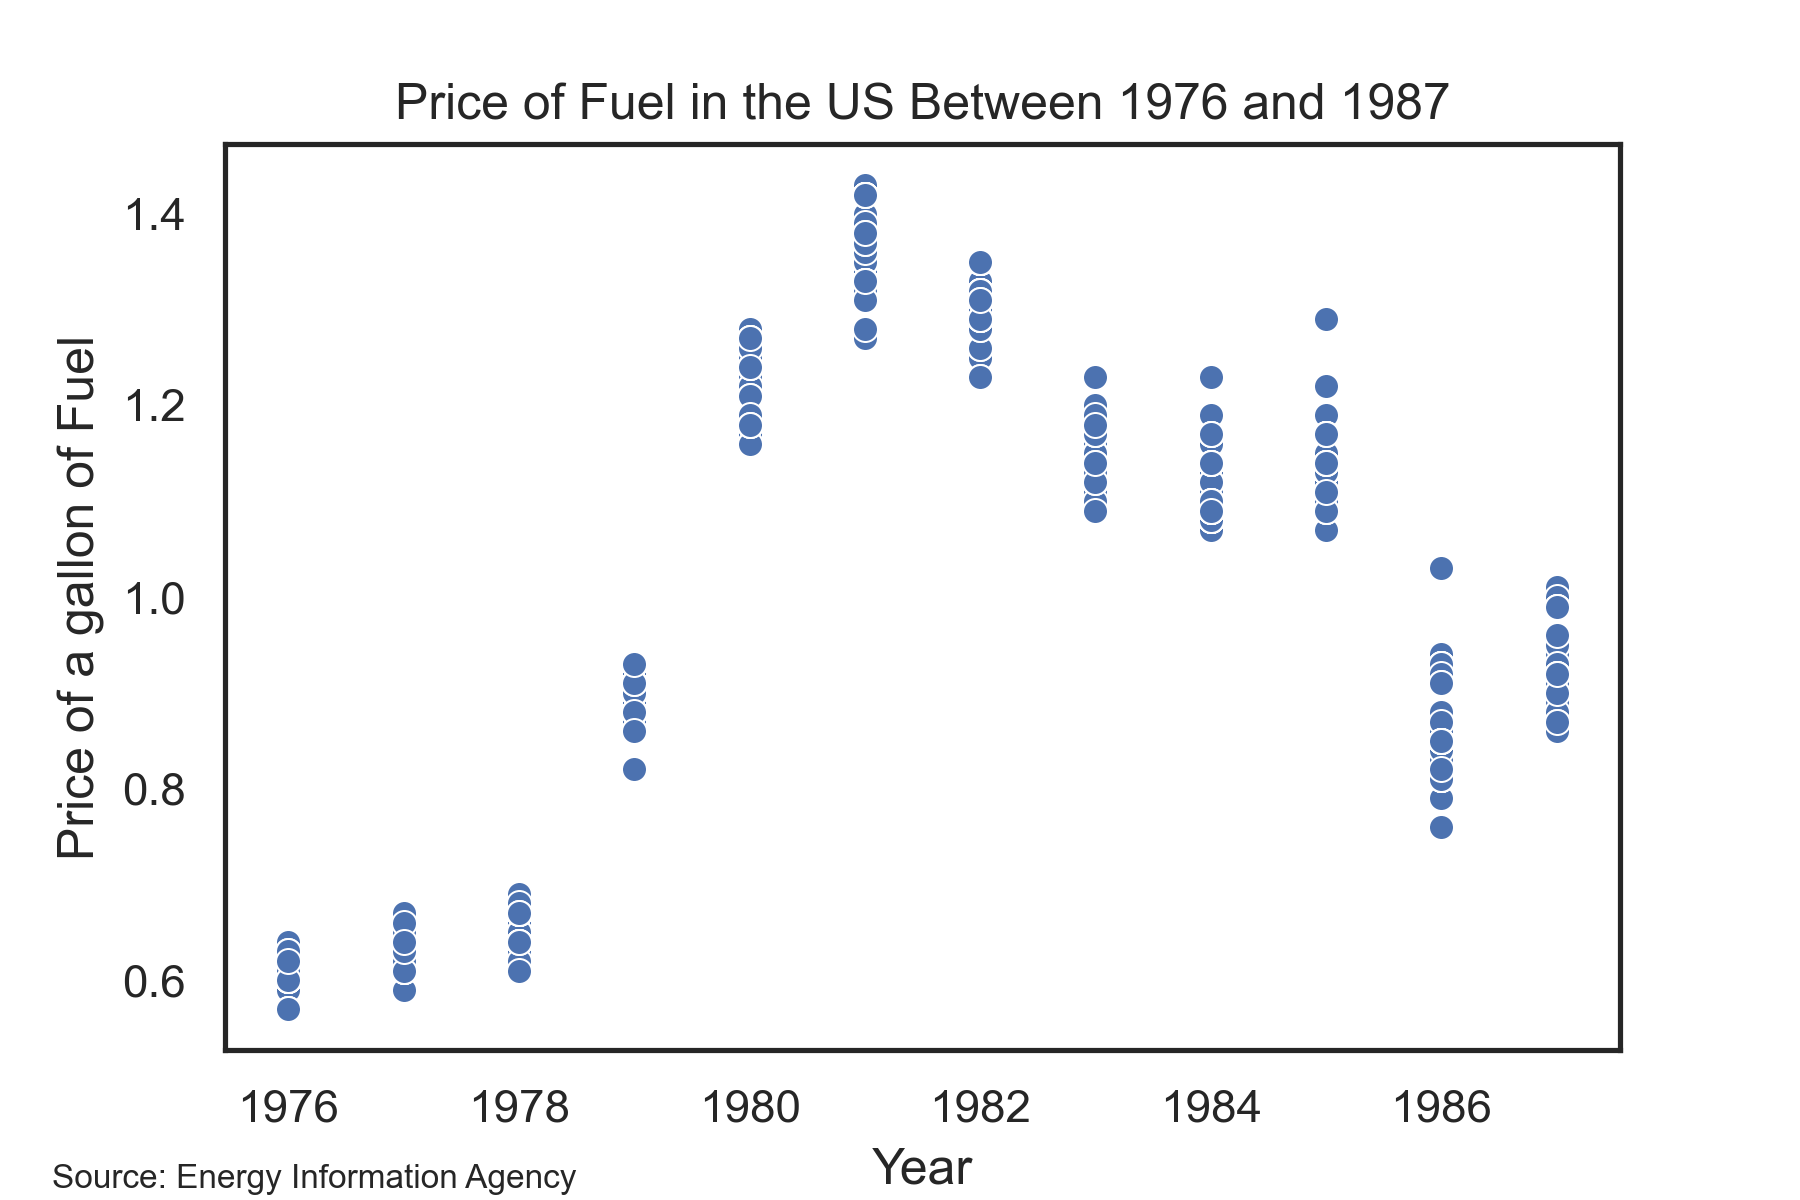

## Part 4: Regressions